Assignment: Satellite Imagery Analysis for Agricultural Monitoring
Objective:
Develop a Python-based tool to analyze time-series satellite imagery for monitoring the health and progress of individual agricultural fields.
Data Source:
Utilize freely available satellite imagery datasets (e.g., from Sentinel-2 or Landsat 8).

Tasks:
1.	Data Retrieval:
a.	Write a Python script to automatically download satellite images for a specific region over a defined time period (e.g., the last 6 months).
b.	Ensure the script can filter images based on cloud cover percentage.
2.	Pre-Processing:
a.	Implement image pre-processing steps including:
b.	Atmospheric correction.
c.	Geometric correction.
d.	Cloud masking.
3.	Vegetation Index Calculation:
a.	Calculate commonly used vegetation indices like NDVI (Normalized Difference Vegetation Index) and EVI (Enhanced Vegetation Index).
b.	Analyze the variation of these indices over the selected time period.
4.	Data Visualization:
a.	Create visualizations (graphs, maps) to represent the time-series analysis of the vegetation indices.
b.	Include a feature to compare different fields or time periods.
5.	Report Generation (Optional):
a.	Automatically generate a summary report including key statistics and visualizations.
6.	Bonus (Optional):
a.	Incorporate a machine learning model to predict future trends based on past satellite data.


Deliverables:
•	Source code in Python, with comments for clarity.
•	A README file explaining how to set up and run the script.
•	A sample output report generated by the script.

Evaluation Criteria:
•	Code quality and readability.
•	Accuracy of the implemented algorithms.
•	Efficiency of data processing.
•	Quality and clarity of the generated outputs and reports.


install packages

In [ ]:
!pip install -U -q sentinelsat rasterio numpy matplotlib scikit-image scipy scikit-learn gdal s2cloudless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.5/802.5 kB 56.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package men

# New Section

Data Retrieval

In [ ]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date

api = SentinelAPI('aashishkawade@gmail.com', 'i_ZHcZb_9GEz4v!')

my_geojson = {
  "type": "Feature",
  "geometry": {
	"type": "Polygon",
	"coordinates": [
	  [
			[
				77.3153999999999968,
				38.8239999999999981
			],
			[
				-77.2956694620074671,
				38.8239999999999981
			],
			[
				-77.2956694620074671,
				38.8392882996798647
			],
			[
				77.3153999999999968,
				38.8392882996798647
			],
			[
				77.3153999999999968,
				38.8239999999999981
			]
	  ],
	]
  },
    "properties": {},
}

footprint = geojson_to_wkt(my_geojson)

products = api.query(
		footprint,
    platformname = 'Sentinel-2',
    date = ('20210701', '20220704'),
    cloudcoverpercentage = (0,10),
    limit=1,timeout = 60)

api.download_all(products)

print('Complete')

ConnectTimeout: HTTPSConnectionPool(host='apihub.copernicus.eu', port=443): Max retries exceeded with url: /apihub/search?format=json&rows=1&start=0&q=beginPosition%3A%5B%222021-07-01T00%3A00%3A00Z%22+TO+%222022-07-04T00%3A00%3A00Z%22%5D+cloudcoverpercentage%3A%5B%220%22+TO+%2210%22%5D+platformname%3A%22Sentinel-2%22+timeout%3A60+footprint%3A%22Intersects%28POLYGON%28%2877.3154+38.8240%2C-77.2957+38.8240%2C-77.2957+38.8393%2C77.3154+38.8393%2C77.3154+38.8240%29%29%29%22 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7f0abc0e78e0>, 'Connection to apihub.copernicus.eu timed out. (connect timeout=None)'))

2nd Task

Pre-Processing:

a.	Implement image pre-processing steps including:

b.	Atmospheric correction.

c.	Geometric correction.

d.	Cloud masking.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp '/content/drive/MyDrive/2024/Growindigo/S2A_MSIL2A_20240101T052221_N0510_R062_T43QEB_20240101T084652.SAFE.zip' '/content/dataset.zip'
!unzip '/content/dataset.zip' -d '/content/dataset'

In [ ]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 7 * (level)
        print('{}- {}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 7 * (level + 1)
        for f in files:
            filename, file_extension = os.path.splitext(f)
            print('{}- {} ({})'.format(subindent, filename, file_extension))

# Call the function with the path to the main folder
list_files('/content/dataset')


- dataset/
       - S2A_MSIL2A_20240101T052221_N0510_R062_T43QEB_20240101T084652.SAFE/
              - manifest (.safe)
              - S2A_MSIL2A_20240101T052221_N0510_R062_T43QEB_20240101T084652-ql (.jpg)
              - INSPIRE (.xml)
              - MTD_MSIL2A (.xml)
              - HTML/
                     - UserProduct_index (.html)
                     - star_bg (.jpg)
                     - UserProduct_index (.xsl)
                     - banner_3 (.png)
                     - banner_2 (.png)
                     - banner_1 (.png)
              - rep_info/
                     - S2_User_Product_Level-2A_Metadata (.xsd)
                     - S2_PDI_Level-2A_Tile_Metadata (.xsd)
                     - S2_PDI_Level-2A_Datastrip_Metadata (.xsd)
              - GRANULE/
                     - L2A_T43QEB_A044532_20240101T052222/
                            - MTD_TL (.xml)
                            - IMG_DATA/
                                   - R10m/
                                          - T43QEB_20240101T052221_AOT_10m (.jp2)
                                          - T43QEB_20240101T052221_B02_10m (.jp2)
                                          - T43QEB_20240101T052221_WVP_10m (.jp2)
                                          - T43QEB_20240101T052221_B03_10m (.jp2)
                                          - T43QEB_20240101T052221_B04_10m (.jp2)
                                          - T43QEB_20240101T052221_TCI_10m (.jp2)
                                          - T43QEB_20240101T052221_B08_10m (.jp2)
                                   - R60m/
                                          - T43QEB_20240101T052221_B11_60m (.jp2)
                                          - T43QEB_20240101T052221_B02_60m (.jp2)
                                          - T43QEB_20240101T052221_B09_60m (.jp2)
                                          - T43QEB_20240101T052221_B03_60m (.jp2)
                                          - T43QEB_20240101T052221_WVP_60m (.jp2)
                                          - T43QEB_20240101T052221_B8A_60m (.jp2)
                                          - T43QEB_20240101T052221_SCL_60m (.jp2)
                                          - T43QEB_20240101T052221_B01_60m (.jp2)
                                          - T43QEB_20240101T052221_TCI_60m (.jp2)
                                          - T43QEB_20240101T052221_B06_60m (.jp2)
                                          - T43QEB_20240101T052221_B05_60m (.jp2)
                                          - T43QEB_20240101T052221_AOT_60m (.jp2)
                                          - T43QEB_20240101T052221_B04_60m (.jp2)
                                          - T43QEB_20240101T052221_B12_60m (.jp2)
                                          - T43QEB_20240101T052221_B07_60m (.jp2)
                                   - R20m/
                                          - T43QEB_20240101T052221_B02_20m (.jp2)
                                          - T43QEB_20240101T052221_B04_20m (.jp2)
                                          - T43QEB_20240101T052221_TCI_20m (.jp2)
                                          - T43QEB_20240101T052221_AOT_20m (.jp2)
                                          - T43QEB_20240101T052221_B8A_20m (.jp2)
                                          - T43QEB_20240101T052221_WVP_20m (.jp2)
                                          - T43QEB_20240101T052221_B03_20m (.jp2)
                                          - T43QEB_20240101T052221_B11_20m (.jp2)
                                          - T43QEB_20240101T052221_B05_20m (.jp2)
                                          - T43QEB_20240101T052221_B06_20m (.jp2)
                                          - T43QEB_20240101T052221_B07_20m (.jp2)
                                          - T43QEB_20240101T052221_SCL_20m (.jp2)
                                          - T43QEB_20240101T052221_B12_20m (.jp2)
                                          - T43QEB_20240101T052221_B01_20m (.jp2)
                            - QI_DATA/
                                   - MSK_DETFOO_B09 (.jp2)
                                   - GEOMETRIC_QUALITY (.xml)
                                   - MSK_DETFOO_B12 (.jp2)
                                   - MSK_DETFOO_B07 (.jp2)
                                   - L2A_QUALITY (.xml)
                                   - MSK_DETFOO_B06 (.jp2)
                                   - MSK_DETFOO_B11 (.jp2)
                                   - MSK_DETFOO_B10 (.jp2)
                                   - MSK_DETFOO_B08 (.jp2)
                                   - MSK_CLASSI_B00 (.jp2)
                                   - MSK_CLDPRB_60m (.jp2)
                                   - MSK_SNWPRB_60m (.jp2)
                                   - MSK_SNWPRB_20m (.jp2)
                                   - MSK_QUALIT_B09 (.jp2)
                                   - MSK_QUALIT_B10 (.jp2)
                                   - MSK_DETFOO_B01 (.jp2)
                                   - MSK_QUALIT_B11 (.jp2)
                                   - MSK_DETFOO_B04 (.jp2)
                                   - MSK_DETFOO_B02 (.jp2)
                                   - FORMAT_CORRECTNESS (.xml)
                                   - MSK_CLDPRB_20m (.jp2)
                                   - MSK_QUALIT_B05 (.jp2)
                                   - MSK_DETFOO_B03 (.jp2)
                                   - MSK_QUALIT_B8A (.jp2)
                                   - MSK_QUALIT_B01 (.jp2)
                                   - MSK_QUALIT_B12 (.jp2)
                                   - MSK_DETFOO_B8A (.jp2)
                                   - SENSOR_QUALITY (.xml)
                                   - MSK_QUALIT_B08 (.jp2)
                                   - MSK_DETFOO_B05 (.jp2)
                                   - MSK_QUALIT_B04 (.jp2)
                                   - GENERAL_QUALITY (.xml)
                                   - MSK_QUALIT_B06 (.jp2)
                                   - MSK_QUALIT_B07 (.jp2)
                                   - MSK_QUALIT_B02 (.jp2)
                                   - T43QEB_20240101T052221_PVI (.jp2)
                                   - MSK_QUALIT_B03 (.jp2)
                            - AUX_DATA/
                                   - AUX_ECMWFT ()
                                   - AUX_CAMSFO ()
              - DATASTRIP/
                     - DS_2APS_20240101T084652_S20240101T052222/
                            - MTD_DS (.xml)
                            - QI_DATA/
                                   - GEOMETRIC_QUALITY (.xml)
                                   - RADIOMETRIC_QUALITY (.xml)
                                   - FORMAT_CORRECTNESS (.xml)
                                   - SENSOR_QUALITY (.xml)
                                   - GENERAL_QUALITY (.xml)

A Ato Corss

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


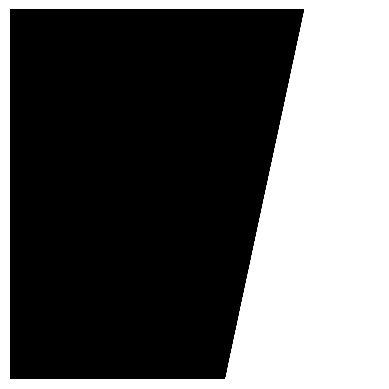

In [ ]:
import os
import rasterio
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt


def preprocess_image(sentinel2_granule_path, output_file):

    # 1. Atmospheric Correction (Further Adjustment?)
    with rasterio.open(os.path.join(sentinel2_granule_path, 'IMG_DATA', 'R10m', 'T43QEB_20240101T052221_B02_10m.jp2')) as src:
        blue = src.read(1)
    with rasterio.open(os.path.join(sentinel2_granule_path, 'IMG_DATA', 'R10m', 'T43QEB_20240101T052221_B03_10m.jp2')) as src:
        green = src.read(1)
    with rasterio.open(os.path.join(sentinel2_granule_path, 'IMG_DATA', 'R10m', 'T43QEB_20240101T052221_B04_10m.jp2')) as src:
        red = src.read(1)
    with rasterio.open(os.path.join(sentinel2_granule_path, 'IMG_DATA', 'R10m', 'T43QEB_20240101T052221_B08_10m.jp2')) as src:
        nir = src.read(1)

    os.makedirs(os.path.dirname(output_file), exist_ok=True)

    # Optionally, you can save the preprocessed image
    with rasterio.open(output_file, 'w', driver='Gtiff',
                       width=src.width, height=src.height,
                       count=4, dtype=src.dtypes[0]) as dst:
        dst.write(blue, 1)
        dst.write(green, 2)
        dst.write(red, 3)
        dst.write(nir, 4)


    # Read the saved image
    with rasterio.open(output_file) as img:
        rgb = np.stack([img.read(3), img.read(2), img.read(1)], axis=-1)

    # Display the image
    plt.imshow(rgb)
    plt.axis('off')
    plt.show()


# Example usage:
input_file = "/content/dataset/S2A_MSIL2A_20240101T052221_N0510_R062_T43QEB_20240101T084652.SAFE/GRANULE/L2A_T43QEB_A044532_20240101T052222/"
output_file = "content/path/to/output/preprocessed_image.tif"

preprocess_image(input_file, output_file)


b.	Atmospheric correction.

In [ ]:
import os
import subprocess

def preprocess_image(sentinel2_granule_path, output_file):
    # Sen2Cor command
    sen2cor_path = "Sen2Cor-02.10.01-win64/L2A_Process"  # Path to Sen2Cor executable
    command = f"{sen2cor_path} --resolution 10 {sentinel2_granule_path} --output_dir {output_file}"

    # Execute Sen2Cor command
    result = subprocess.run(command, shell=True, capture_output=True, text=True)

    if result.returncode == 0:
        print("Sen2Cor execution successful!")
        print(result.stdout)  # Output from Sen2Cor
    else:
        print("Sen2Cor execution failed. Error:")
        print(result.stderr)  # Error messages from Sen2Cor

# Example usage:
input_file = "DataSets/S2A_MSIL2A_20240101T052221_N0510_R062_T43QEB_20240101T084652.SAFE/GRANULE/L2A_T43QEB_A044532_20240101T052222/"
output_file = "preprocessed_image.tif"

preprocess_image(input_file, output_file)


c.	Geometric correction

In [ ]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import os

def geometric_correction(input_file, output_file):
    with rasterio.open(input_file) as src:
        # Calculate default transform to EPSG:4326
        transform, width, height = calculate_default_transform(
            src.crs, 'EPSG:4326', src.width, src.height, *src.bounds)

        # Update metadata with new CRS and transform
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': 'EPSG:4326',
            'transform': transform,
            'width': width,
            'height': height
        })

        # Create output directory if it doesn't exist
        os.makedirs(os.path.dirname(output_file), exist_ok=True)

        # Write to the corrected image
        with rasterio.open(output_file, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs='EPSG:4326',
                    resampling=Resampling.nearest)

# Example usage:
input_file = "/content/dataset/S2A_MSIL2A_20240101T052221_N0510_R062_T43QEB_20240101T084652.SAFE/GRANULE/L2A_T43QEB_A044532_20240101T052222/IMG_DATA/R10m/T43QEB_20240101T052221_B02_10m.jp2"
output_file = "contenttt/path/to/output/geometric_corrected_image.tif"

geometric_correction(input_file, output_file)


d.	Cloud masking.

In [ ]:
import rasterio
import numpy as np
from s2cloudless import S2PixelCloudDetector

def cloud_detection_and_masking(input_image_path, output_cloud_mask_path, output_masked_image_path):
    # Load the image
    with rasterio.open(input_image_path) as src:
        data = src.read([2, 3, 4, 8])  # Read the image data
        data = np.expand_dims(data, axis=0)  # Add a new axis to make it 4-dimensional

        # Create cloud detector
        cloud_detector = S2PixelCloudDetector(threshold=0.4,all_bands=True)

        # Get cloud probability maps
        cloud_probs = cloud_detector.get_cloud_probability_maps(data)

        # Remove the added axis
        cloud_probs = np.squeeze(cloud_probs, axis=0)

        # Create cloud mask (adjust threshold as needed)
        cloud_mask = cloud_probs >= 0.6

        # Save the cloud mask
        with rasterio.open(output_cloud_mask_path, 'w', **src.profile) as dst:
            dst.write(cloud_mask.astype(rasterio.uint8), 1)

        # Apply mask to original image
        masked_data = data.copy()
        masked_data[cloud_mask] = 0

        # Save the masked image
        with rasterio.open(output_masked_image_path, 'w', **src.profile) as dst:
            dst.write(np.squeeze(masked_data, axis=0))


# Example usage:
input_image_path = '/content/contenttt/path/to/output/geometric_corrected_image.tif'
output_cloud_mask_path = '/content/contenttt/path/to/output/cloud_mask.tif'
output_masked_image_path = '/content/contenttt/path/to/output/masked_image.tif'

cloud_detection_and_masking(input_image_path, output_cloud_mask_path, output_masked_image_path)


ValueError: Parameter `all_bands` is set to True, but images have 11300 bands.

# Googale earth Einge

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import ee
import geemap

In [ ]:
ee.Authenticate()  # Follow the prompts for authorization
ee.Initialize(project='ee-aashishkawade')    # Initi

1.Data Retrieval:

a.	Write a Python script to automatically download satellite images for a specific region over a defined time period (e.g., the last 6 months).

b.	Ensure the script can filter images based on cloud cover percentage.


In [ ]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:

# Check if a feature has been drawn
if Map.draw_last_feature is not None:
    # Extract the feature as an ee.Feature
    last_drawn_feature = Map.draw_last_feature

    # Get the geometry from the feature
    last_drawn_geometry = last_drawn_feature.geometry()

    # Extract the coordinates
    coordinates = last_drawn_geometry.getInfo()['coordinates']

    print('Rectangle coordinates:', coordinates)

    # Assuming the drawn rectangle is a standard rectangle (not rotated)
    lower_left = coordinates[0][0]  # First set of coordinates
    upper_right = coordinates[0][2]  # Opposite diagonal coordinates

    # Create the ee.Geometry.Rectangle
    aoi_rectangle = ee.Geometry.Rectangle([lower_left, upper_right])
    print(aoi_rectangle,"lower_upper_left_right")
    # Use 'aoi_rectangle' for further analysis
else:
    print("No feature has been drawn. Please draw a rectangle on the map.")


Rectangle coordinates: [[[75.154921, 19.761514], [75.154921, 19.965584], [75.507917, 19.965584], [75.507917, 19.761514], [75.154921, 19.761514]]]
ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              75.154921,
              19.965584
            ],
            [
              75.154921,
              19.761514
            ],
            [
              75.507917,
              19.761514
            ],
            [
              75.507917,
              19.965584
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
}) lower_upper_left_right


In [ ]:
import ee
import geemap

try:
  ee.Initialize()
except Exception as e:
  ee.Authenticate()
  ee.Initialize()

# Define the time period of interest
start_date = '2023-06-01'
end_date = '2023-12-01'

# Load the Sentinel-2 image collection and apply filters
s2_collection = ee.ImageCollection('COPERNICUS/S2_SR') \
    .filterBounds(aoi_rectangle) \
    .filterDate(start_date, end_date) \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))

# Define bands of interest
bands = ['B2', 'B3', 'B4', 'B8']

# Iterate over images in the collection and export each one
images = s2_collection.select(bands).toList(s2_collection.size())

for i in range(images.size().getInfo()):
  image = ee.Image(images.get(i))

  # Set up an export task
  task = ee.batch.Export.image.toDrive(
      image=image,
      description=f'sentinel2_image_{i}',  # Descriptive name with index
      folder='my_gee_data',
      region=aoi_rectangle,
      scale=10
  )

  # Start the export task
  task.start()

2.Pre-Processing:

a.Implement image pre-processing steps including:

b.Atmospheric correction.

c.Geometric correction.

d.Cloud masking.



In [ ]:

cloud_cover_max = 20  # Max cloud cover percentage

# Load the Sentinel-2 L2A data
s2_data = (ee.ImageCollection('COPERNICUS/S2_SR')
           .filterBounds(aoi_rectangle)
           .filterDate(ee.Date(start_date), ee.Date(end_date))
           .filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', cloud_cover_max)))

# Set visualization parameters
vis_params = {
    'bands': ['B4', 'B3', 'B2'],
    'min': 0,
    'max': 3000,
    'gamma': 1.4,
}
Map = geemap.Map()
# Add the Sentinel-2 data to the map
#Add true color image to map console

Map.addLayer(s2_data.mean(), vis_params, 'Sentinel-2 image')

# Set the map center
Map.centerObject(aoi_rectangle, 11)

# Display the map
Map

b.Atmospheric correction.

In [ ]:
# Load Sentinel-2 L2A data (already atmospherically corrected)
s2_l2a = ee.ImageCollection('COPERNICUS/S2_SR') \
          .filterBounds(aoi_rectangle) \
          .filterDate('2023-06-01', '2023-12-01') \
          .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))

# Select the bands for visualization
rgb_vis = {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000}

# Get a median composite and clip to the AOI
rgb_image = s2_l2a.median().clip(aoi_rectangle)
# Create an interactive map
Map = geemap.Map()
Map.addLayer(rgb_image, rgb_vis, 'RGB Composite')
Map.centerObject(aoi_rectangle, 10)
Map


c.Geometric correction.

Geometric correction typically involves adjusting satellite imagery for optical distortion, ensuring that the scale of the image is uniform across all axes. For most modern satellite data available on Google Earth Engine (GEE), including Sentinel-2, geometric corrections are already applied as part of standard preprocessing. This means the data is typically ready for analysis without additional geometric correction steps.

Reprojecting Sentinel-2 Imagery

In [ ]:
# Load Sentinel-2 L2A data (geometrically corrected)
s2_l2a = ee.ImageCollection('COPERNICUS/S2_SR') \
          .filterBounds(aoi_rectangle) \
          .filterDate('2023-06-01', '2023-12-01') \
          .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)) \
          .median() \
          .clip(aoi_rectangle)

# Reproject the image to WGS 84 / Pseudo-Mercator (EPSG:3857)
reprojected_image = s2_l2a.reproject('EPSG:3857')

# Visualization parameters
vis_params = {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000}

# Create an interactive map
Map = geemap.Map()
Map.addLayer(reprojected_image, vis_params, 'Reprojected Sentinel-2 imagery')
Map.centerObject(aoi_rectangle, 10)
Map

d.Cloud masking.

In [ ]:

# Load Sentinel-2 L2A data
s2_l2a = ee.ImageCollection('COPERNICUS/S2_SR') \
          .filterBounds(aoi_rectangle) \
          .filterDate(start_date,end_date)

# Function to mask clouds using the QA60 band
def mask_clouds(image):
    qa = image.select('QA60')
    cloud_mask = qa.bitwiseAnd(1 << 10).Or(qa.bitwiseAnd(1 << 11)).eq(0)
    return image.updateMask(cloud_mask).divide(10000)

# Apply the cloud masking function
masked_s2_l2a = s2_l2a.map(mask_clouds)

# Composite the images using median after masking
composite = masked_s2_l2a.median().clip(aoi_rectangle)

# Visualization parameters
vis_params = {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3}
qa60_vis_params = {'min': 0, 'max': 1, 'palette': ['white', 'black']}

# Select the QA60 band from the first image for visualization
qa60 = s2_l2a.first().select('QA60').clip(aoi_rectangle)

# Create an interactive map
Map = geemap.Map()
Map.addLayer(composite, vis_params, 'Cloud Masked Sentinel-2 imagery')
Map.centerObject(aoi_rectangle, 10)
Map.addLayer(qa60, qa60_vis_params, 'QA60 band')
Map


In [ ]:
# Function to export image to Google Drive
def export_to_drive(image, description, folder, scale, region):
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=description,
        folder=folder,
        scale=scale,
        region=region.getInfo()['coordinates']
    )
    task.start()

# Export the original image
export_to_drive(composite, 'Original_Image', 'EarthEngineImages', 10, aoi_rectangle)

# Export the cloud mask
cloud_mask = mask_clouds(s2_l2a.first()).select('QA60')
export_to_drive(cloud_mask, 'Cloud_Mask', 'EarthEngineImages', 10, aoi_rectangle)

# Export the QA60 band
export_to_drive(qa60, 'QA60_Band', 'EarthEngineImages', 10, aoi_rectangle)


3.Vegetation Index Calculation:

a.Calculate commonly used vegetation indices like NDVI (Normalized Difference Vegetation Index) and EVI (Enhanced Vegetation Index).

b.Analyze the variation of these indices over the selected time period.


In [ ]:
aoi_rectangle

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              75.154921,
              19.965584
            ],
            [
              75.154921,
              19.761514
            ],
            [
              75.507917,
              19.761514
            ],
            [
              75.507917,
              19.965584
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})

In [ ]:

# Load Sentinel-2 Data and Calculate NDVI and EVI
# Function to calculate NDVI
def add_ndvi(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

# Function to calculate EVI
def add_evi(image):
    evi = image.expression(
        '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))',
        {
            'NIR': image.select('B8'),
            'RED': image.select('B4'),
            'BLUE': image.select('B2')
        }).rename('EVI')
    return image.addBands(evi)

# Load Sentinel-2 data
s2 = ee.ImageCollection('COPERNICUS/S2') \
       .filterDate(ee.Date(start_date), ee.Date(end_date)) \
       .filterBounds(aoi_rectangle) \
       .map(add_ndvi) \
       .map(add_evi)

# Create an interactive map
Map = geemap.Map()

# Set visualization parameters for NDVI and EVI
ndvi_params = {'bands': 'NDVI', 'min': 0, 'max': 1, 'palette': ['blue', 'green']}
evi_params = {'bands': 'EVI', 'min': 0, 'max': 1, 'palette': ['black', 'green']}

# Add layers to the map
Map.addLayer(s2.select('NDVI').mean(), ndvi_params, 'Mean NDVI')
Map.addLayer(s2.select('EVI').mean(), evi_params, 'Mean EVI')

# Center the map
Map.centerObject(aoi_rectangle, 10)

# Show the map
Map

b.Analyze the variation of these indices over the selected time period.

In [ ]:
import ee
import folium
from IPython.display import display

# Initialize the Earth Engine
ee.Initialize()

# Define the Area of Interest (AOI)
aoi_rectangle = ee.Geometry.Polygon(
    [[[75.15, 19.75],
      [75.15, 20.05],
      [75.55, 20.05],
      [75.55, 19.75],
      [75.15, 19.75]]])

# Load Sentinel-2 data
s2 = ee.ImageCollection('COPERNICUS/S2') \
       .filterDate('2023-06-01', '2023-12-01') \
       .filterBounds(aoi_rectangle)

# Function to calculate EVI
def add_evi(image):
    evi = image.expression(
        '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))',
        {
            'NIR': image.select('B8'),
            'RED': image.select('B4'),
            'BLUE': image.select('B2')
        }).rename('EVI')
    return image.addBands(evi)

# Apply the EVI calculation function
evi_series = s2.map(add_evi)

# Define a function to create a Folium map
def create_folium_map(image, aoi):
    location = aoi.centroid().coordinates().getInfo()[::-1]  # Reverse to [lat, lon]
    folium_map = folium.Map(location=location, zoom_start=12)
    map_id_dict = ee.Image(image).getMapId({'min': 0, 'max': 1, 'palette': ['white', 'green']})
    folium.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
        overlay=True,
        name='EVI',
    ).add_to(folium_map)
    return folium_map

# Display EVI time-series within Folium maps
results = evi_series.toList(evi_series.size())
for i in range(results.size().getInfo()):
    img = ee.Image(results.get(i))
    folium_map = create_folium_map(img.select('EVI'), aoi_rectangle)
    display(folium_map)


4.Data Visualization:

a.	Create visualizations (graphs, maps) to represent the time-series analysis of the vegetation indices.

b.	Include a feature to compare different fields or time periods.


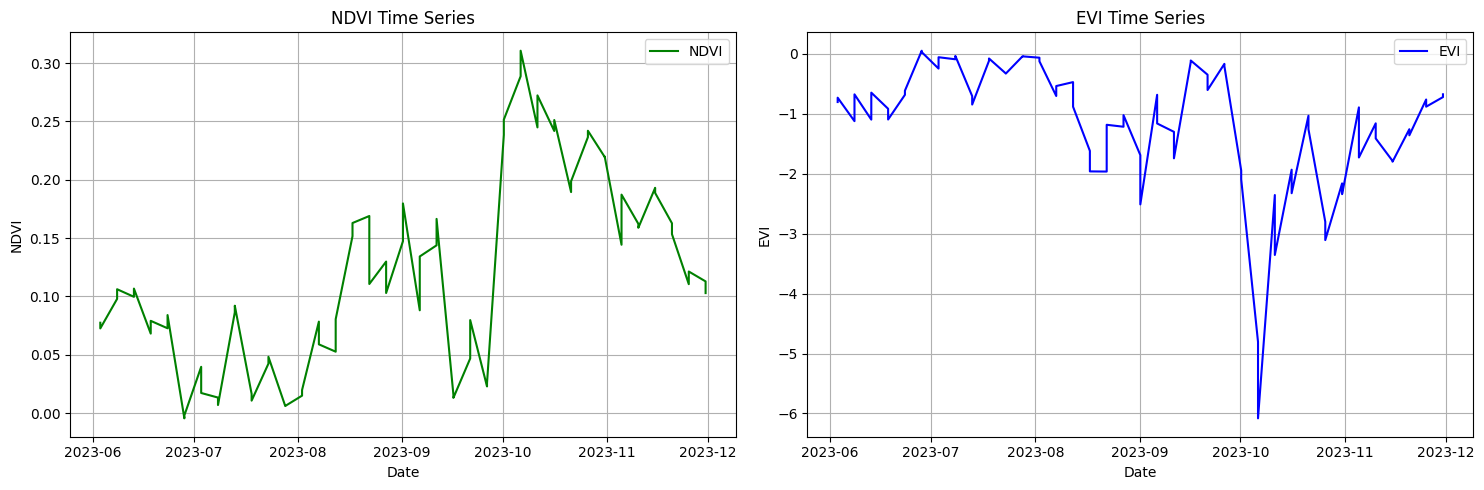

In [ ]:
import ee
import pandas as pd
import matplotlib.pyplot as plt

ee.Initialize()

# Define your AOI and time range
aoi_rectangle = ee.Geometry.Polygon([[[75.15, 19.75], [75.15, 20.05], [75.55, 20.05], [75.55, 19.75], [75.15, 19.75]]])
start_date = '2023-06-01'
end_date = '2023-12-01'

# Load Sentinel-2 data and calculate NDVI and EVI
s2 = ee.ImageCollection('COPERNICUS/S2') \
       .filterDate(start_date, end_date) \
       .filterBounds(aoi_rectangle) \
       .map(lambda image: image.addBands(image.normalizedDifference(['B8', 'B4']).rename('NDVI'))) \
       .map(lambda image: image.addBands(image.expression('2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))',
        {'NIR': image.select('B8'), 'RED': image.select('B4'), 'BLUE': image.select('B2')}).rename('EVI')))

# Function to extract mean NDVI and EVI
def extract_mean(image):
    mean_dict = image.reduceRegion(reducer=ee.Reducer.mean(), geometry=aoi_rectangle, scale=30, maxPixels=1e9, bestEffort=True)
    return image.set('date', image.date().format()).set(mean_dict)

# Apply the function to the image collection
time_series = s2.map(extract_mean)

# Extract the data
data = time_series.reduceColumns(ee.Reducer.toList(3), ['date', 'NDVI', 'EVI']).getInfo()['list']
df = pd.DataFrame(data, columns=['date', 'NDVI', 'EVI'])
df['date'] = pd.to_datetime(df['date'])

# Plotting
plt.figure(figsize=(15, 5))

# Plot NDVI
plt.subplot(1, 2, 1)
plt.plot(df['date'], df['NDVI'], label='NDVI', color='green')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI Time Series')
plt.grid(True)
plt.legend()

# Plot EVI
plt.subplot(1, 2, 2)
plt.plot(df['date'], df['EVI'], label='EVI', color='blue')
plt.xlabel('Date')
plt.ylabel('EVI')
plt.title('EVI Time Series')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


b.Include a feature to compare different fields or time periods.

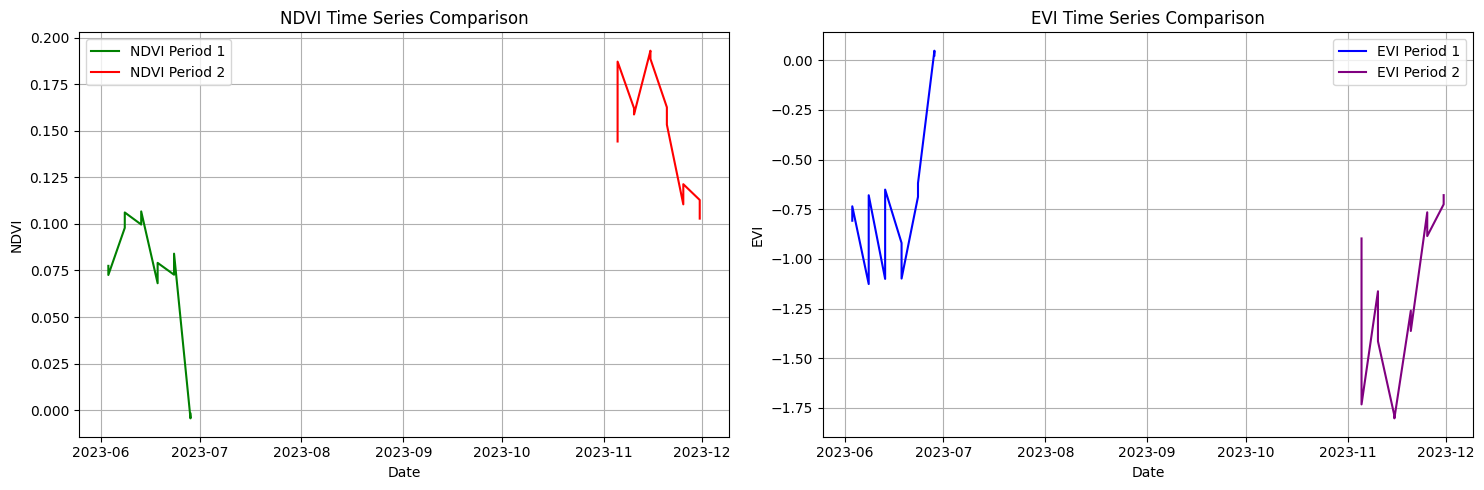

In [ ]:
import ee
import pandas as pd
import matplotlib.pyplot as plt

ee.Initialize()

# Define your AOI
aoi_rectangle = ee.Geometry.Polygon([[[75.15, 19.75], [75.15, 20.05], [75.55, 20.05], [75.55, 19.75], [75.15, 19.75]]])

# Load Sentinel-2 data
def load_s2_data(start_date, end_date):
    return ee.ImageCollection('COPERNICUS/S2') \
            .filterDate(start_date, end_date) \
            .filterBounds(aoi_rectangle) \
            .map(lambda image: image.addBands(image.normalizedDifference(['B8', 'B4']).rename('NDVI'))) \
            .map(lambda image: image.addBands(image.expression('2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))',
            {'NIR': image.select('B8'), 'RED': image.select('B4'), 'BLUE': image.select('B2')}).rename('EVI')))

# Function to extract mean NDVI and EVI
def extract_mean(image):
    mean_dict = image.reduceRegion(reducer=ee.Reducer.mean(), geometry=aoi_rectangle, scale=30, maxPixels=1e9)
    return image.set('date', image.date().format()).set(mean_dict)

# Time periods
period_1 = load_s2_data('2023-06-01', '2023-07-01').map(extract_mean)
period_2 = load_s2_data('2023-11-01', '2023-12-01').map(extract_mean)

# Extract the data
data_period_1 = period_1.reduceColumns(ee.Reducer.toList(3), ['date', 'NDVI', 'EVI']).getInfo()['list']
df_period_1 = pd.DataFrame(data_period_1, columns=['date', 'NDVI', 'EVI'])
df_period_1['date'] = pd.to_datetime(df_period_1['date'])

data_period_2 = period_2.reduceColumns(ee.Reducer.toList(3), ['date', 'NDVI', 'EVI']).getInfo()['list']
df_period_2 = pd.DataFrame(data_period_2, columns=['date', 'NDVI', 'EVI'])
df_period_2['date'] = pd.to_datetime(df_period_2['date'])

# Plotting
plt.figure(figsize=(15, 5))

# Plot NDVI
plt.subplot(1, 2, 1)
plt.plot(df_period_1['date'], df_period_1['NDVI'], label='NDVI Period 1', color='green')
plt.plot(df_period_2['date'], df_period_2['NDVI'], label='NDVI Period 2', color='red')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI Time Series Comparison')
plt.grid(True)
plt.legend()

# Plot EVI
plt.subplot(1, 2, 2)
plt.plot(df_period_1['date'], df_period_1['EVI'], label='EVI Period 1', color='blue')
plt.plot(df_period_2['date'], df_period_2['EVI'], label='EVI Period 2', color='purple')
plt.xlabel('Date')
plt.ylabel('EVI')
plt.title('EVI Time Series Comparison')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


6.Bonus (Optional):

a.Incorporate a machine learning model to predict future trends based on past satellite data.


In [ ]:
# Convert dates to a numerical format (ordinal)
df['date_ordinal'] = df['date'].apply(lambda x: x.toordinal())

# Prepare training data
X = df[['date_ordinal']]  # Features
y_ndvi = df['NDVI']       # NDVI target
y_evi = df['EVI']         # EVI target


Create and Train the Model
We will create separate models for NDVI and EVI:

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train NDVI model
model_ndvi = LinearRegression()
model_ndvi.fit(X, y_ndvi)

# Create and train EVI model
model_evi = LinearRegression()
model_evi.fit(X, y_evi)


LinearRegression()

Predict Future Trends
Predict NDVI and EVI for a future date. Let's say you want to predict for '2024-01-01':

In [ ]:
import datetime

# Convert future date to ordinal
future_date = datetime.datetime.strptime('2024-01-01', '%Y-%m-%d').toordinal()

# Predict NDVI and EVI for the future date
predicted_ndvi = model_ndvi.predict([[future_date]])
predicted_evi = model_evi.predict([[future_date]])

print(f"Predicted NDVI on 2024-01-01: {predicted_ndvi[0]}")
print(f"Predicted EVI on 2024-01-01: {predicted_evi[0]}")


Predicted NDVI on 2024-01-01: 0.22825884611120273
Predicted EVI on 2024-01-01: -2.218967410671212


NOw using Deep Learning LSTM

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import ee
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Initialize Earth Engine
ee.Initialize()

# Define your AOI and time range
aoi_rectangle = ee.Geometry.Polygon([[[75.15, 19.75], [75.15, 20.05], [75.55, 20.05], [75.55, 19.75], [75.15, 19.75]]])
start_date = '2023-06-01'
end_date = '2023-12-01'

# Load Sentinel-2 data and calculate NDVI and EVI
s2 = ee.ImageCollection('COPERNICUS/S2') \
       .filterDate(start_date, end_date) \
       .filterBounds(aoi_rectangle) \
       .map(lambda image: image.addBands(image.normalizedDifference(['B8', 'B4']).rename('NDVI'))) \
       .map(lambda image: image.addBands(image.expression(
            '2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))',
            {'NIR': image.select('B8'), 'RED': image.select('B4'), 'BLUE': image.select('B2')}).rename('EVI')))

# Function to extract mean NDVI and EVI
def extract_mean(image):
    mean_dict = image.reduceRegion(reducer=ee.Reducer.mean(), geometry=aoi_rectangle, scale=30, maxPixels=1e9)
    return image.set('date', image.date().format()).set(mean_dict)

# Apply the function to the image collection
time_series = s2.map(extract_mean)

# Extract the data
data = time_series.reduceColumns(ee.Reducer.toList(3), ['date', 'NDVI', 'EVI']).getInfo()['list']
df = pd.DataFrame(data, columns=['date', 'NDVI', 'EVI'])
df['date'] = pd.to_datetime(df['date'])

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df[['NDVI', 'EVI']])

# Prepare data for LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

look_back = 1
X, y = create_dataset(scaled_features, look_back)
X = np.reshape(X, (X.shape[0], look_back, 2))  # Corrected reshape

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the LSTM model for NDVI
model_ndvi = Sequential()
model_ndvi.add(LSTM(50, input_shape=(look_back, 2)))  # Adjusted input shape
model_ndvi.add(Dense(1))
model_ndvi.compile(optimizer='adam', loss='mean_squared_error')
model_ndvi.fit(X_train, y_train[:, 0], epochs=100, batch_size=1, verbose=2)

# Define and train the LSTM model for EVI
model_evi = Sequential()
model_evi.add(LSTM(50, input_shape=(look_back, 2)))  # Adjusted input shape
model_evi.add(Dense(1))
model_evi.compile(optimizer='adam', loss='mean_squared_error')
model_evi.fit(X_train, y_train[:, 1], epochs=100, batch_size=1, verbose=2)

# Model Evaluation
y_pred_ndvi = model_ndvi.predict(X_test)
y_pred_evi = model_evi.predict(X_test)

print('NDVI Model RMSE:', np.sqrt(mean_squared_error(y_test[:, 0], y_pred_ndvi)))
print('EVI Model RMSE:', np.sqrt(mean_squared_error(y_test[:, 1], y_pred_evi)))

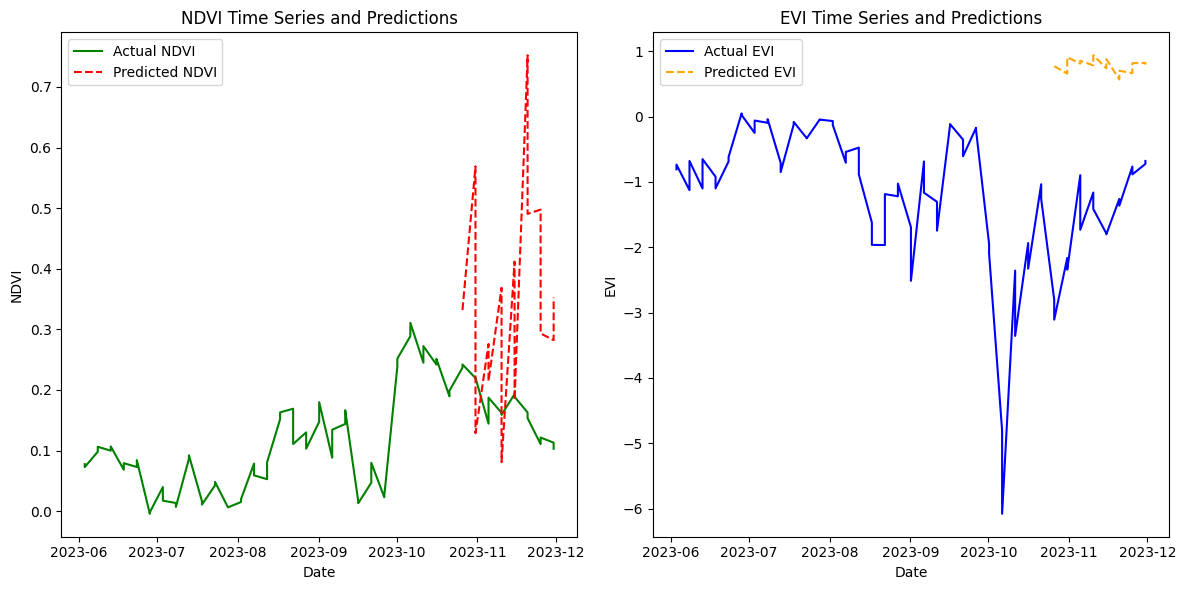

1/1 [==============================] - 0s 34ms/step
Next Predicted NDVI: 0.10334314405918121
Next Predicted EVI: -1.203277349472046


In [ ]:
plt.figure(figsize=(12, 6))

# NDVI Plot
plt.subplot(1, 2, 1)
plt.plot(df['date'], df['NDVI'], label='Actual NDVI', color='green')
plt.plot(df['date'].iloc[-len(y_pred_ndvi):], y_pred_ndvi.flatten(), label='Predicted NDVI', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI Time Series and Predictions')
plt.legend()

# EVI Plot
plt.subplot(1, 2, 2)
plt.plot(df['date'], df['EVI'], label='Actual EVI', color='blue')
plt.plot(df['date'].iloc[-len(y_pred_evi):], y_pred_evi.flatten(), label='Predicted EVI', color='orange', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('EVI')
plt.title('EVI Time Series and Predictions')
plt.legend()

plt.tight_layout()
plt.show()
# Prepare the last 'look_back' number of data points as input for future predictions
last_input = scaled_features[-look_back:]
last_input_reshaped = np.reshape(last_input, (1, look_back, 2))

# Predict the next NDVI and EVI values
next_pred_ndvi, next_pred_evi = model_ndvi.predict(last_input_reshaped), model_evi.predict(last_input_reshaped)
next_pred_ndvi, next_pred_evi = scaler.inverse_transform(np.hstack((next_pred_ndvi, next_pred_evi))).flatten()

print(f"Next Predicted NDVI: {next_pred_ndvi}")
print(f"Next Predicted EVI: {next_pred_evi}")